# ArdiPilot Log Plotting

Using <https://github.com/PyFlightCoach/ArdupilotLogReader>

In [1]:
!which python3

/Users/jasonbowman/opt/anaconda3/bin/python3


In [2]:
!pip install -r requirements.txt

     |████████████████████████████████| 11.8 MB 7.5 MB/s eta 0:00:01


In [3]:
!pip install ardupilot-log-reader

In [4]:
from matplotlib import pyplot as plt

In [19]:
from ardupilot_log_reader import Ardupilot
bin_file = 'logs/2-20-25_data/pitch.bin'
#bin_file = 'logs/log_1_2025-2-3-22-14-44_ArduPilot_Window.bin'
#bin_file = 'logs/log_2_2025-2-3-22-18-56_ArduPilot_Window.bin'
# For fiields, see https://ardupilot.org/plane/docs/logmessages.html
parser = Ardupilot.parse(
    bin_file, # the log file, .bin
    types = [
        'ACC', # IMU accelerometer data
        'GYR', # IMU gyroscope data
        'MAG', # Information received from compasses
        'MAGH', # Magnetometer high resolution data'
        'ARSP', 
        'ATT', # Canonical vehicle attitude
        'POS', # Canonical vehicle position: Lat, Lng, Alt
        'BARO', 
        'GPS', 
        'GPA', # GPS accuracy information like VDop and HAcc
        'IMU', # Inertial Measurement Unit data: gyro, accelerometer, error count, rate
        'RCIN', 
        'RCOU', 
        'BAT', 
        'MODE', 
        'NKF1', # EKF2 estimator outputs: pitch, roll, yaw, velocity, distance from origin NED
        'STAT', 
        'XKF1', # EKF3 estimator outputs:  pitch, roll, yaw, velocity, distance from origin NED PN, PE, PD
        'XKQ', # EKF3 quaternion defining the rotation from NED to XYZ (autopilot) axes
        'XKT', # EKF3 timing information like smallest IMU sample interval
        'AHR2', # Backup AHRS data. Pitch, roll, yaw, altitude, lat, lon, attitude quaternion
        'ARM', # Arming status including checks
        ],  # fields to read from the log
    #  'ATTITUDE', 'LOCAL_POSITION_NED', 
    )

#print(parser.dfs) # a dict containing a dataframes of log data for each field requested.
#print(parser.join_logs(['ARSP', 'ATT'])) #returns a pandas dataframe containing the ARSP and ATT data joined on time
#print(parser.parms) # returns the parameters read from the top of the log

In [16]:
for k in parser.dfs.keys():
    print(k, parser.dfs[k].keys())

PARM Index(['timestamp', 'TimeUS', 'Name', 'Value', 'Default'], dtype='object')
ATT Index(['timestamp', 'TimeUS', 'DesRoll', 'Roll', 'DesPitch', 'Pitch', 'DesYaw',
       'Yaw', 'ErrRP', 'ErrYaw', 'AEKF'],
      dtype='object')
IMU Index(['timestamp', 'TimeUS', 'I', 'GyrX', 'GyrY', 'GyrZ', 'AccX', 'AccY',
       'AccZ', 'EG', 'EA', 'T', 'GH', 'AH', 'GHz', 'AHz'],
      dtype='object')
XKF1 Index(['timestamp', 'TimeUS', 'C', 'Roll', 'Pitch', 'Yaw', 'VN', 'VE', 'VD',
       'dPD', 'PN', 'PE', 'PD', 'GX', 'GY', 'GZ', 'OH'],
      dtype='object')
XKQ Index(['timestamp', 'TimeUS', 'C', 'Q1', 'Q2', 'Q3', 'Q4'], dtype='object')
AHR2 Index(['timestamp', 'TimeUS', 'Roll', 'Pitch', 'Yaw', 'Alt', 'Lat', 'Lng',
       'Q1', 'Q2', 'Q3', 'Q4'],
      dtype='object')
POS Index(['timestamp', 'TimeUS', 'Lat', 'Lng', 'Alt', 'RelHomeAlt',
       'RelOriginAlt'],
      dtype='object')
GPS Index(['timestamp', 'TimeUS', 'I', 'Status', 'GMS', 'GWk', 'NSats', 'HDop',
       'Lat', 'Lng', 'Alt', 'Spd', 'GCrs',

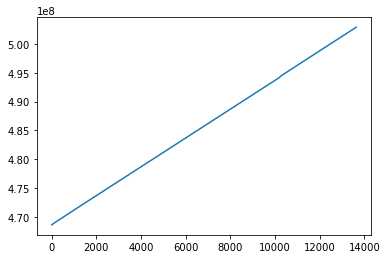

In [17]:
plt.plot(parser.dfs['ATT']['TimeUS']) # check that we have a single time series with no jumps

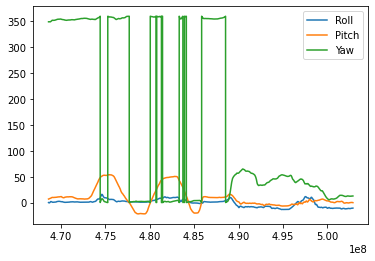

In [18]:
plt.plot(parser.dfs['ATT']['TimeUS'], parser.dfs['ATT']['Roll'], label='Roll')
plt.plot(parser.dfs['ATT']['TimeUS'], parser.dfs['ATT']['Pitch'], label='Pitch')
plt.plot(parser.dfs['ATT']['TimeUS'], parser.dfs['ATT']['Yaw'], label='Yaw')
plt.legend()

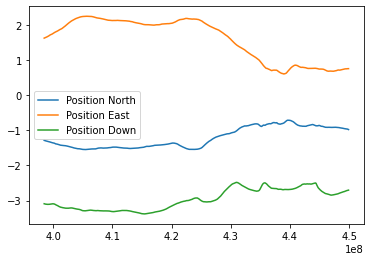

In [14]:
plt.plot(parser.dfs['XKF1']['TimeUS'], parser.dfs['XKF1']['PN'], label='Position North')
plt.plot(parser.dfs['XKF1']['TimeUS'], parser.dfs['XKF1']['PE'], label='Position East')
plt.plot(parser.dfs['XKF1']['TimeUS'], parser.dfs['XKF1']['PD'], label='Position Down')
plt.legend()